In [1]:
import tensorflow as tf # pip install tensorflow

# Hide GPU from visible devices for tensorflow 2.3.1 and above
tf.config.set_visible_devices([], 'GPU')

import cv2 # pip install opencv-python
# pip install opencv-contrib-python    fullpackage
import os
import matplotlib.pyplot as plt #pip install matplotlib
import numpy as np # pip install numpy

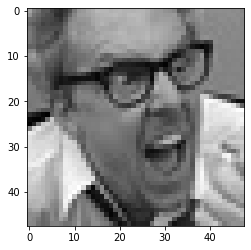

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

img_array.shape # 48, 48, 3

plt.imshow(img_array) #BGR

# Training dataset

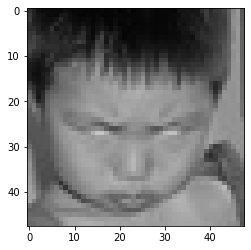

In [3]:
Datadirectory = "Training/" # training dataset

Classes = ["0","1","2","3","4","5","6"] # list of classes = exact name of your folder

for category in Classes:
    path = os.path.join(Datadirectory, category) # loading every class
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        # backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# Resizing Img 48x48 to 224x224

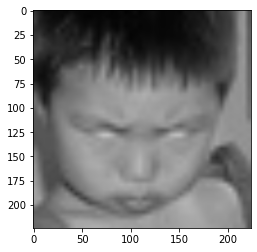

In [4]:
img_size = 224 ## ImageNet =>224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
new_array.shape

(224, 224, 3)

# Read all images and convert them to array

In [2]:
Datadirectory = "Training/" # training dataset

Classes = ["0","1","2","3","4","5","6"] # list of classes = exact name of your folder

training_Data = [] # data array

img_size = 224

a = "not in loop"

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1, # label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
                a.app = "here"
            except Exception as e:
                pass

create_training_Data()
print(len(training_Data))

28709


In [3]:
temp = np.array(training_Data)
temp.shape

C:\Users\a\AppData\Local\Temp\ipykernel_13908\115100705.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


(28709, 2)

In [4]:
import random

random.shuffle(training_Data)

In [5]:
X = [] # data/feature
y = [] # label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimensions

In [6]:
X.shape

(28709, 224, 224, 3)

In [7]:
# normalizing image before using deep learning

# X = X/255.0; Can't normalize directly

for i in range(0, 28709): # img numbers
    X[i] = X[i]/255.0

In [8]:
type(y)

list

In [9]:
Y = np.array(y)

Y.shape

(28709,)

# Deep learning model for training - Transfer Learning

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.MobileNetV2() # Pre-trained Model

model.summary() # checking deep learning model

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Transfer Learning - Tuning, weights will start from last check point

In [11]:
base_input = model.layers[0].input ## input

base_output = model.layers[-2].output

base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [12]:
final_output = layers.Dense(128)(base_output) # adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # for 7 classes
# softmax classification layer

final_output # output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [13]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [14]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
new_model.fit(X,Y, epochs=25)

Epoch 1/25
898/898 [==============================] - 2577s 3s/step - loss: 1.8077 - accuracy: 0.2532
Epoch 2/25
898/898 [==============================] - 4493s 5s/step - loss: 1.7989 - accuracy: 0.2578
Epoch 3/25
898/898 [==============================] - 2424s 3s/step - loss: 1.7965 - accuracy: 0.2589
Epoch 4/25
898/898 [==============================] - 2447s 3s/step - loss: 1.7958 - accuracy: 0.2608
Epoch 5/25
898/898 [==============================] - 2284s 3s/step - loss: 1.7968 - accuracy: 0.2594
Epoch 6/25
898/898 [==============================] - 2297s 3s/step - loss: 1.7968 - accuracy: 0.2580
Epoch 7/25
898/898 [==============================] - 2315s 3s/step - loss: 1.7946 - accuracy: 0.2610
Epoch 8/25
898/898 [==============================] - 2298s 3s/step - loss: 1.7952 - accuracy: 0.2598
Epoch 9/25
898/898 [==============================] - 2309s 3s/step - loss: 1.7944 - accuracy: 0.2603
Epoch 10/25
898/898 [==============================] - 2309s 3s/step - loss: 1.792

In [16]:
new_model.save('Final_model_95p07.h5')

In [17]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [ ]:
new_model.evaluate # test data, will not use test, deploy live image demo

In [39]:
frame = cv2.imread('supriseman.jpg')

In [40]:
frame.shape

(339, 509, 3)

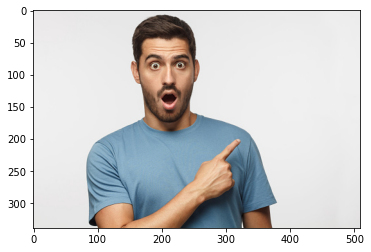

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Face detection algorithm
# Haar cascade face detection is based on gray image


In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [43]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [44]:
gray.shape

(339, 509)

# Detecting faces, crop face_roi

In [45]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2) #BGR
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0 :
        print("Face not detected")
    else :
        for (ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

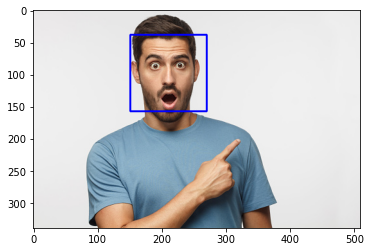

In [46]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

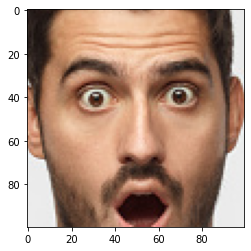

In [47]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

# Enhancing image

In [48]:
final_image = cv2.resize(face_roi, (224, 224)) # resizing to 224X224
final_image = np.expand_dims(final_image, axis=0) # need four dimensions
final_image = final_image/255.0 # normalizing

# Prediction

In [49]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 119ms/step


In [50]:
Predictions[0]

array([0.17608838, 0.00175541, 0.24083248, 0.27956596, 0.07192853,
       0.09920359, 0.13062559], dtype=float32)

In [51]:
np.argmax(Predictions)

3